In [2]:
!pip install split-folders

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import drive
import zipfile
import splitfolders
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [5]:
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/digit_21.zip'
destination_folder = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)
print("Extraction completed.")

Extraction completed.


In [6]:
import splitfolders

input_folder = '/content/digit_21'
output_folder = '/content/split_dataset'
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2), group_prefix=None)

print("Dataset split completed.")

Copying files: 30687 files [00:04, 7001.11 files/s]

Dataset split completed.


In [7]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [8]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [9]:
tr_df = train_df('/content/split_dataset/train')
tr_df

,Class Path,Class
0,/content/split_dataset/train/3/0_GAZI_17_2_107...,3
1,/content/split_dataset/train/3/1_GOP_12_1_216.jpg,3
2,/content/split_dataset/train/3/0_PAB_16_1_1372...,3
3,/content/split_dataset/train/3/0_RAJ_18_2_1395...,3
4,/content/split_dataset/train/3/0_MAN_17_2_1234...,3
...,...,...
24541,/content/split_dataset/train/4/1_DHA_12_1_809.jpg,4
24542,/content/split_dataset/train/4/1_BAR_15_1_453.jpg,4
24543,/content/split_dataset/train/4/1_BAR_13_1_430.jpg,4
24544,/content/split_dataset/train/4/1_KIS_12_1_1157...,4


In [10]:
ts_df = test_df('/content/split_dataset/val')
ts_df

,Class Path,Class
0,/content/split_dataset/val/3/0_CHAN_19_3_31.jpg,3
1,/content/split_dataset/val/3/1_MAG_15_1_1235.jpg,3
2,/content/split_dataset/val/3/1_DHA_14_1_945.jpg,3
3,/content/split_dataset/val/3/0_NIL_20_3_1322.jpg,3
4,/content/split_dataset/val/3/0_CHUA_19_3_514.jpg,3
...,...,...
6136,/content/split_dataset/val/4/1_TAN_12_1_1564.jpg,4
6137,/content/split_dataset/val/4/1_DHA_13_1_890.jpg,4
6138,/content/split_dataset/val/4/1_DHA_15_1_1000.jpg,4
6139,/content/split_dataset/val/4/1_RANG_12_1_298.jpg,4


In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
4112,/content/split_dataset/val/7/1_MUG_11_1_1256.jpg,7
5077,/content/split_dataset/val/8/0_DHA_14_1_785.jpg,8
1874,/content/split_dataset/val/9/1_BAR_12_1_407.jpg,9
5454,/content/split_dataset/val/8/0_CPOM_23__580.jpg,8
2732,/content/split_dataset/val/5/0_DHA_11_1_677.jpg,5
...,...,...
2712,/content/split_dataset/val/5/1_Rang_21_3_00086...,5
2237,/content/split_dataset/val/9/0_DHA_18_2_993.jpg,9
5227,/content/split_dataset/val/8/1_PIR_11_1_1434.jpg,8
5762,/content/split_dataset/val/4/0_DHA_13_1_719.jpg,4


In [12]:
batch_size = 32
img_size = (28, 28)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 24546 validated image filenames belonging to 10 classes.
Found 3070 validated image filenames belonging to 10 classes.
Found 3071 validated image filenames belonging to 10 classes.


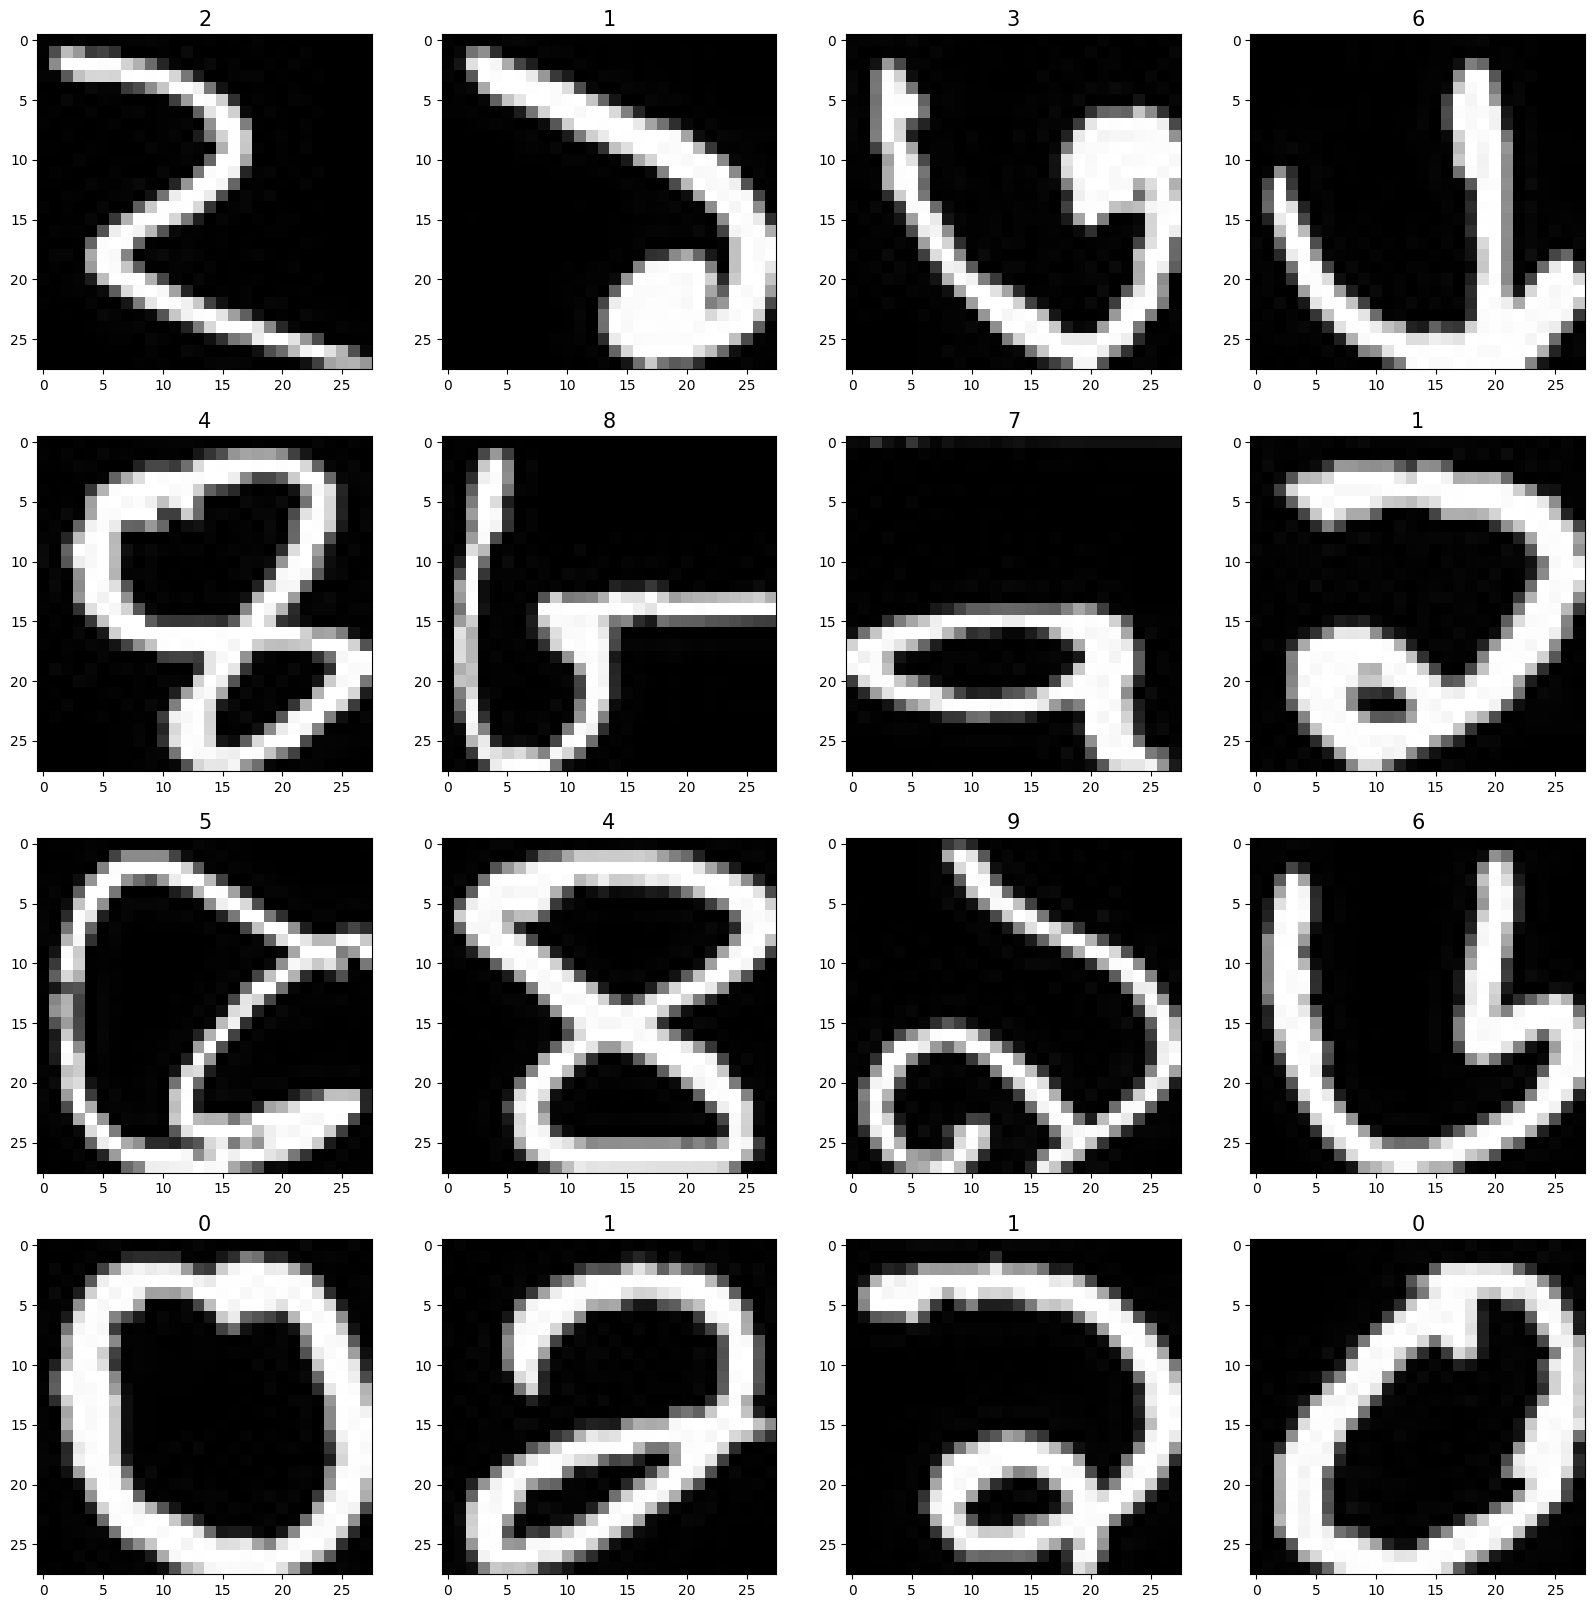

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

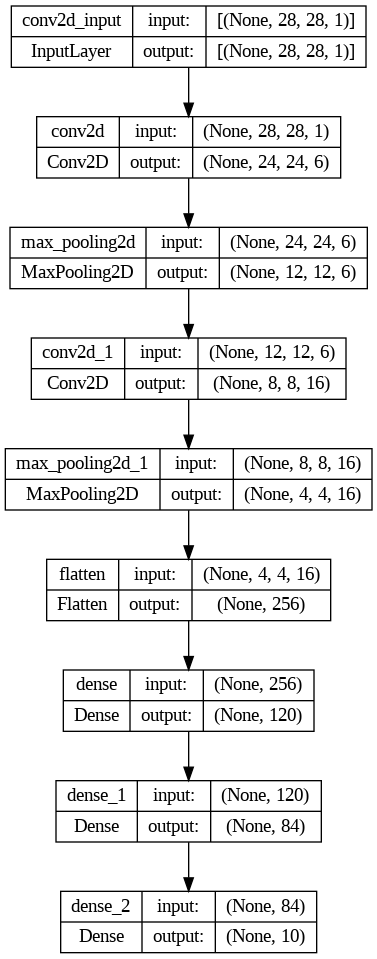

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
# Define batch size and number of epochs
batch_size = 32
epochs = 10


history = model.fit_generator(
    generator=tr_gen,
    steps_per_epoch=len(tr_gen),
    epochs=epochs,
    validation_data=valid_gen,
    validation_steps=len(valid_gen)
)


Epoch 1/10
768/768 [==============================] - 26s 24ms/step - loss: 0.5444 - accuracy: 0.8237 - precision: 0.9270 - recall: 0.7662 - val_loss: 0.3384 - val_accuracy: 0.8883 - val_precision: 0.9391 - val_recall: 0.8632
Epoch 2/10
768/768 [==============================] - 19s 24ms/step - loss: 0.2657 - accuracy: 0.9129 - precision: 0.9567 - recall: 0.8834 - val_loss: 0.2217 - val_accuracy: 0.9228 - val_precision: 0.9543 - val_recall: 0.8980
Epoch 3/10
768/768 [==============================] - 19s 25ms/step - loss: 0.1876 - accuracy: 0.9358 - precision: 0.9635 - recall: 0.9175 - val_loss: 0.1878 - val_accuracy: 0.9329 - val_precision: 0.9573 - val_recall: 0.9199
Epoch 4/10
768/768 [==============================] - 17s 23ms/step - loss: 0.1485 - accuracy: 0.9506 - precision: 0.9692 - recall: 0.9361 - val_loss: 0.1712 - val_accuracy: 0.9410 - val_precision: 0.9570 - val_recall: 0.9270
Epoch 5/10
768/768 [==============================] - 18s 24ms/step - loss: 0.1142 - accuracy: 0

In [ ]:
hist = history

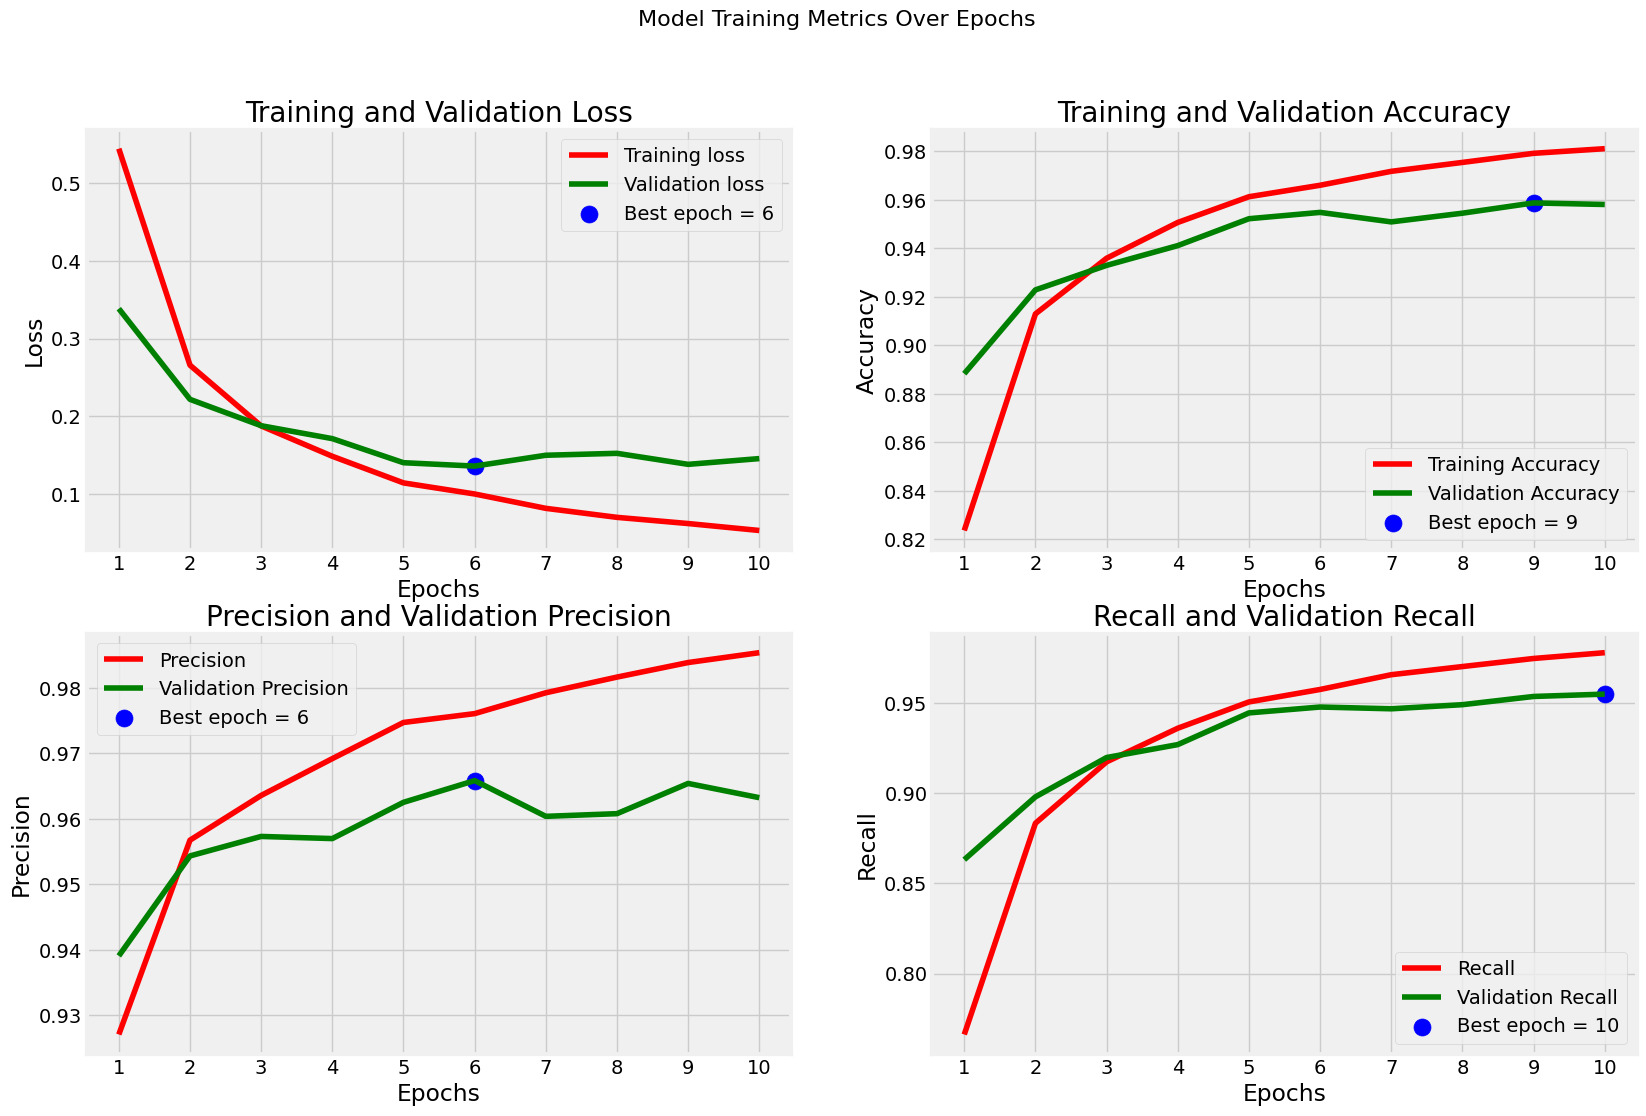

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(Epochs), max(Epochs)+1, 1.0))

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)

plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

In [ ]:
# model.save('/content/drive/My Drive/LeNet_digit_model.h5')

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [1]:
from keras.models import load_model

In [17]:
saved_lenet_model = load_model('/content/drive/My Drive/LeNet_digit_model.h5')

In [18]:
preds = saved_lenet_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

192/192 [==============================] - 1s 6ms/step


In [19]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.93      0.96      0.94       307
           2       0.98      0.99      0.99       306
           3       0.96      0.97      0.97       308
           4       0.96      0.98      0.97       307
           5       0.97      0.98      0.97       307
           6       0.98      0.95      0.97       307
           7       0.98      0.97      0.98       308
           8       0.99      0.99      0.99       308
           9       0.97      0.90      0.93       306

    accuracy                           0.97      3071
   macro avg       0.97      0.97      0.97      3071
weighted avg       0.97      0.97      0.97      3071



In [22]:
train_score = saved_lenet_model.evaluate(tr_gen, verbose=1)
valid_score = saved_lenet_model.evaluate(valid_gen, verbose=1)
test_score = saved_lenet_model.evaluate(ts_gen, verbose=1)

192/192 [==============================] - 1s 7ms/step - loss: 0.1169 - accuracy: 0.9687


In [27]:
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)

print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

Train Loss: 0.0264
Train Accuracy: 99.19%
--------------------
Test Loss: 0.1169
Test Accuracy: 97.87%
